In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

sns.set_style("whitegrid")

In [197]:
df = pd.read_json('train.json')
df.drop(columns=['id'], inplace=True)
display(df.head(20))
print('number of data points: ', len(df))

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."


number of data points:  39774


In [198]:
all_ingredients = np.concatenate(tuple(df.ingredients.values[i] for i in range(len(df.ingredients.values))))
unique_ingredients, counts = np.unique(all_ingredients, return_counts=True)
print('unique number of ingredients in dataset: ', len(unique_ingredients))
# count_by_cuisine = df.groupby(['cuisine']).count()
# count_by_cuisine['recipe count'] = count_by_cuisine['ingredients']
# cuisines = count_by_cuisine.index.values
# count_by_cuisine.drop(columns=['ingredients'], inplace=True)
# display(count_by_cuisine)

unique number of ingredients in dataset:  6714


In [199]:
highest_count_indices = np.argsort(counts)[-100:]
highest_counts = np.flip(counts[highest_count_indices])
best_ings = np.flip(unique_ingredients[highest_count_indices])

In [200]:
one_hot_df = df.copy()
one_hot_df.head(5)

for ingredient in best_ings:
    one_hot_df[ingredient] = pd.Series([], dtype=int)
    for i in range(len(one_hot_df)):
        one_hot_df.loc[i, ingredient] = int(any(ingredient in recipe_ing for recipe_ing in one_hot_df.loc[i, 'ingredients']))
    one_hot_df[ingredient] = one_hot_df[ingredient].astype(int)
display(one_hot_df)

C:\Users\Ronak Desai\AppData\Local\Temp\ipykernel_1016\3111392003.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot_df[ingredient] = pd.Series([], dtype=int)


,cuisine,ingredients,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,...,zucchini,ground beef,dried thyme,large garlic cloves,tomato sauce,flour tortillas,buttermilk,plum tomatoes,coconut milk,granulated sugar
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,indian,"[water, vegetable oil, wheat, salt]",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ...",1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte...",1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
39772,chinese,"[boneless chicken skinless thigh, minced garli...",1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
X = one_hot_df.iloc[:, 2:]
y = one_hot_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [202]:
X_train.iloc[:,:]

,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,zucchini,ground beef,dried thyme,large garlic cloves,tomato sauce,flour tortillas,buttermilk,plum tomatoes,coconut milk,granulated sugar
1069,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9971,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28726,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35804,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2656,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28787,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
20245,0,0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11421,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27867,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
kfold = StratifiedKFold(5, shuffle=True, random_state=10)
max_neighbors = 20
knn_accs = np.zeros((5, max_neighbors))
i = 0
for train_index, test_index in kfold.split(X_train, y_train.values):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for k in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(k)
        knn.fit(X_tt.values, y_tt.values)
        
        pred = knn.predict(X_ho.values)
        
        knn_accs[i,j] = accuracy_score(y_ho.values, pred)
        j = j + 1
    i = i + 1

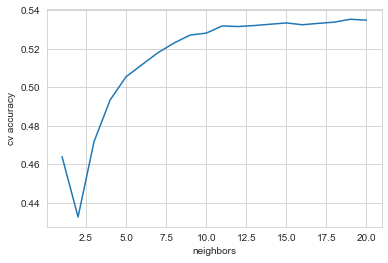

Highest Accuracy:  0.5353  with  18  neighbors


In [204]:
accuracies = np.mean(knn_accs, axis=0)
plt.figure()
plt.plot(np.arange(1, 21, 1), accuracies)
plt.xlabel('neighbors')
plt.ylabel('cv accuracy')
plt.show()
print('Highest Accuracy: ', np.round(np.max(accuracies), 4), ' with ', np.argmax(accuracies), ' neighbors')

In [205]:
kfold = StratifiedKFold(5, shuffle=True, random_state=10)
num_ingredients = np.arange(20, 101, 10)
ing_accs = np.zeros((5, len(num_ingredients)))
i = 0
for train_index, test_index in kfold.split(X_train, y_train.values):
    X_tt = X_train.iloc[train_index]
    X_ho = X_train.iloc[test_index]
    y_tt = y_train.iloc[train_index]
    y_ho = y_train.iloc[test_index]
    j = 0
    for k in num_ingredients:
        knn = KNeighborsClassifier(11)
        knn.fit(X_tt.iloc[:, :k].values, y_tt.values)
        
        pred = knn.predict(X_ho.iloc[:, :k].values)
        
        ing_accs[i,j] = accuracy_score(y_ho.values, pred)
        j = j + 1
    i = i + 1

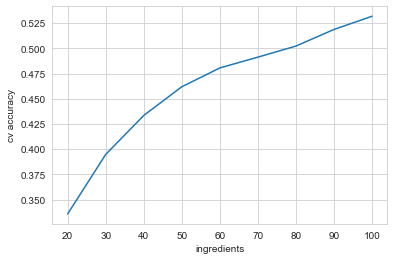

Highest Accuracy:  0.5318  with  100  ingredients


In [206]:
accuracies = np.mean(ing_accs, axis=0)
plt.figure()
plt.plot(num_ingredients, accuracies)
plt.xlabel('ingredients')
plt.ylabel('cv accuracy')
plt.show()
print('Highest Accuracy: ', np.round(np.max(accuracies), 4), ' with ', num_ingredients[np.argmax(accuracies)], ' ingredients')